#### validation dataset generation   

In [1]:
import torch
import numpy as np
from glob import glob
import rasterio as rio
from notebooks import config
from utils.imgShow import imsShow
from utils.img2patch import img2patch


In [ ]:
patch_size = 768  
edge_overlay = 40 


In [82]:
# ## valset
paths_valset = list(zip(config.paths_scene_val, 
                        config.paths_dem_val, 
                        config.paths_truth_val))
paths_valset[4]


('data/dset/scene/l7_scene_04_nor.tif',
 'data/dset/dem/l7_scene_04_dem_nor.tif',
 'data/dset/truth/l7_scene_04.tif')

In [83]:
## generate validation patches (include patch,dem,truth)
dset_list = []
for path_scene, path_dem, path_truth in paths_valset:
    print(path_scene)
    scene_val_arr = rio.open(path_scene).read()
    truth_val_arr = rio.open(path_truth).read(1)
    dem_val_arr = rio.open(path_dem).read()
    # dem_adjust_val_arr = rio.open(path_dem.replace('dem_nor', 'dem_adjust_nor')).read()
    ## image to patches
    scene_dem_truth_arr = np.concatenate([scene_val_arr, 
                                        dem_val_arr,
                                        # dem_adjust_val_arr, 
                                        truth_val_arr[np.newaxis, ...]], 
                                        axis=0)
    img2patches = img2patch(img = scene_dem_truth_arr.transpose(1,2,0), 
                            patch_size = patch_size, 
                            edge_overlay = edge_overlay,
                            drop_last = True) 
    patch_list = img2patches.toPatch()
    print(len(patch_list))
    dset_list.extend(patch_list)
    # break
print(len(dset_list))


data/dset/scene/l5_scene_01_nor.tif
1
data/dset/scene/l5_scene_05_nor.tif
1
data/dset/scene/l5_scene_09_nor.tif
1
data/dset/scene/l5_scene_13_nor.tif
1
data/dset/scene/l7_scene_04_nor.tif
1
data/dset/scene/l7_scene_08_nor.tif
1
data/dset/scene/l7_scene_12_nor.tif
1
data/dset/scene/l8_scene_03_nor.tif
1
data/dset/scene/l8_scene_07_nor.tif
1
data/dset/scene/l8_scene_11_nor.tif
1
data/dset/scene/l9_scene_02_nor.tif
1
data/dset/scene/l9_scene_06_nor.tif
1
data/dset/scene/l9_scene_10_nor.tif
1
data/dset/scene/s2_scene_01_nor.tif
9
data/dset/scene/s2_scene_05_nor.tif
1
data/dset/scene/s2_scene_09_nor.tif
1
data/dset/scene/s2_scene_13_nor.tif
1
25


In [84]:
'''---- save validation data (patch, dem, truth)----'''
dir_valset = f'data/dset/valset/patch_{patch_size}'
# dir_valset = f'data/dset/valset/patch_{patch_size}_dem_adjust'
for id_patch, patch_pdem_ptruth in enumerate(dset_list):
    print(id_patch)
    ## save as float16 to save space
    patch_ = torch.from_numpy(patch_pdem_ptruth).to(dtype=torch.float16)  
    path_save = dir_valset+'/patch_pdem_ptruth_'+ str(id_patch).rjust(4,'0')+'.pt'
    print(path_save)
    torch.save((patch_), path_save)
    # break 


0
data/dset/valset/patch_1536/patch_pdem_ptruth_0000.pt
1
data/dset/valset/patch_1536/patch_pdem_ptruth_0001.pt
2
data/dset/valset/patch_1536/patch_pdem_ptruth_0002.pt
3
data/dset/valset/patch_1536/patch_pdem_ptruth_0003.pt
4
data/dset/valset/patch_1536/patch_pdem_ptruth_0004.pt
5
data/dset/valset/patch_1536/patch_pdem_ptruth_0005.pt
6
data/dset/valset/patch_1536/patch_pdem_ptruth_0006.pt
7
data/dset/valset/patch_1536/patch_pdem_ptruth_0007.pt
8
data/dset/valset/patch_1536/patch_pdem_ptruth_0008.pt
9
data/dset/valset/patch_1536/patch_pdem_ptruth_0009.pt
10
data/dset/valset/patch_1536/patch_pdem_ptruth_0010.pt
11
data/dset/valset/patch_1536/patch_pdem_ptruth_0011.pt
12
data/dset/valset/patch_1536/patch_pdem_ptruth_0012.pt
13
data/dset/valset/patch_1536/patch_pdem_ptruth_0013.pt
14
data/dset/valset/patch_1536/patch_pdem_ptruth_0014.pt
15
data/dset/valset/patch_1536/patch_pdem_ptruth_0015.pt
16
data/dset/valset/patch_1536/patch_pdem_ptruth_0016.pt
17
data/dset/valset/patch_1536/patch_pdem

### load data and check

In [85]:
## load data
paths_patch_valset = sorted(glob(dir_valset + '/*'))
patch_list_valset = [torch.load(path, weights_only=True) for path in paths_patch_valset]
print(len(patch_list_valset))


25


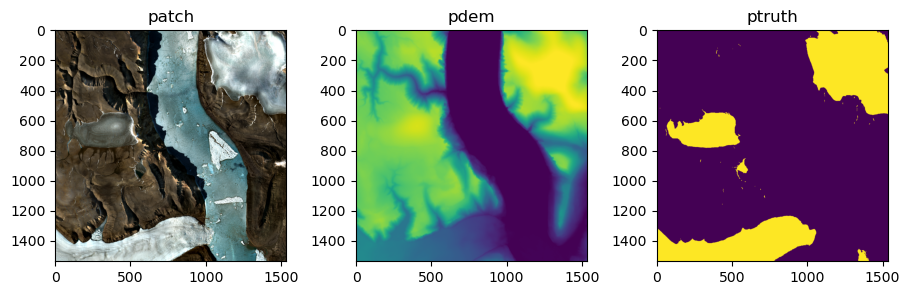

In [86]:
id = np.random.randint(0, len(patch_list_valset))
patch_pdem_ptruth = patch_list_valset[id].numpy()   ## (patches,pdem,ptruth)
patch = patch_pdem_ptruth[:,:,0:6].astype(np.float32)
pdem = patch_pdem_ptruth[:,:,6:7].astype(np.float32)  
ptruth = patch_pdem_ptruth[:, :, -1:].astype(np.int8)  
patch_pdem_ptruth_ = [patch, pdem, ptruth]  
imgs_name = ['patch', 'pdem', 'ptruth']  
clip_list = [2,2,0]  
col_bands_list = [(2,1,0), (0,0,0), (0,0,0)]
imsShow(img_list=patch_pdem_ptruth_, 
            img_name_list=imgs_name,
            clip_list=clip_list, 
            color_bands_list=col_bands_list,
            figsize=(11,3))
